# This dataset consisting of sales and profit data sorted by market segment and country/region.

- The Goal is to make Exploratory Data Analysis (EDA) to this data set and to create some visualizations. 
  This project has 3 parts:

 - Part 1: Imports, links, and loading

 - Part 2: Exploratory Data Analysis (EDA)

 - Part 3: Build visualizations

# Task 1: Imports, links, and loading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data set into dataframe
df = pd.read_csv('E:\Financials.csv')

# Task 2: Exploratory Data Analysis (EDA)

In [3]:
# show the first few rows of the dataframe
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [4]:
# get the size of the dataframe
df.size

11200

- The number of elements in this DataFrame is: 11200

In [5]:
# get the shape of the dataframe
df.shape

(700, 16)

- This dataset consists of 700 rows and 16 columns.

In [6]:
# get basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [7]:
# Get the dataframe's columns
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

* Noticed that some columns has additional spaces, and must be removed.

In [8]:
# remove additional spaces
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [9]:
# Remove '$', '-' and commas from columns containing numerical data
numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for col in numeric_cols:
    df[col] = df[col].replace({'\$': '', '-': '', ',': ''}, regex=True)

# Convert columns to appropriate numeric data types, handling missing values
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount Band        700 non-null    object 
 4   Units Sold           700 non-null    float64
 5   Manufacturing Price  700 non-null    float64
 6   Sale Price           700 non-null    float64
 7   Gross Sales          700 non-null    float64
 8   Discounts            647 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               637 non-null    float64
 12  Date                 700 non-null    object 
 13  Month Number         700 non-null    int64  
 14  Month Name           700 non-null    object 
 15  Year                 700 non-null    int

In [11]:
# change the name of COGS column to Cost of Goods Sold
df.rename(columns={'COGS': 'Cost of Goods Sold'}, inplace=True)

In [12]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,Cost of Goods Sold,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [13]:
# look for missing values
df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
Cost of Goods Sold      0
Profit                 63
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [14]:
# drop missing values
df = df.dropna()
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,Cost of Goods Sold,Profit,Date,Month Number,Month Name,Year
53,Government,France,Paseo,Low,3945.0,10.0,7.0,27615.0,276.15,27338.85,19725.0,7613.85,01/01/2014,1,January,2014
54,Midmarket,France,Paseo,Low,2296.0,10.0,15.0,34440.0,344.40,34095.60,22960.0,11135.60,01/02/2014,2,February,2014
55,Government,France,Paseo,Low,1030.0,10.0,7.0,7210.0,72.10,7137.90,5150.0,1987.90,01/05/2014,5,May,2014
56,Government,France,Velo,Low,639.0,120.0,7.0,4473.0,44.73,4428.27,3195.0,1233.27,01/11/2014,11,November,2014
57,Government,Canada,VTT,Low,1326.0,250.0,7.0,9282.0,92.82,9189.18,6630.0,2559.18,01/03/2014,3,March,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


In [15]:
# check for duplicates
df.duplicated().sum()

0

In [16]:
# Generate a table of describtive statistics
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,Cost of Goods Sold,Profit,Month Number,Year
count,584.000000,584.000000,584.000000,5.840000e+02,584.000000,5.840000e+02,584.000000,584.000000,584.000000,584.000000
mean,1590.744007,96.369863,120.082192,1.817756e+05,13484.053116,1.682915e+05,141006.316781,27285.220103,8.005137,2013.739726
std,870.856267,108.714649,144.481637,2.670847e+05,24290.271204,2.477062e+05,212291.135059,42328.938483,3.341866,0.439160
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,1.000000,2013.000000
25%,884.500000,5.000000,12.000000,1.636600e+04,908.750000,1.496274e+04,7066.500000,3815.707500,6.000000,2013.000000
50%,1514.000000,10.000000,20.000000,3.250500e+04,2531.760000,3.003674e+04,19395.000000,10728.115000,9.000000,2014.000000
75%,2216.750000,250.000000,300.000000,2.668250e+05,13328.000000,2.435912e+05,223875.000000,25243.500000,11.000000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


# Task 3: Build visualizations

In [17]:
segment = df.groupby(['Segment'], as_index=False)['Profit'].sum()
segment

,Segment,Profit
0,Channel Partners,1150321.14
1,Enterprise,101775.63
2,Government,10270950.18
3,Midmarket,563253.09
4,Small Business,3848268.50


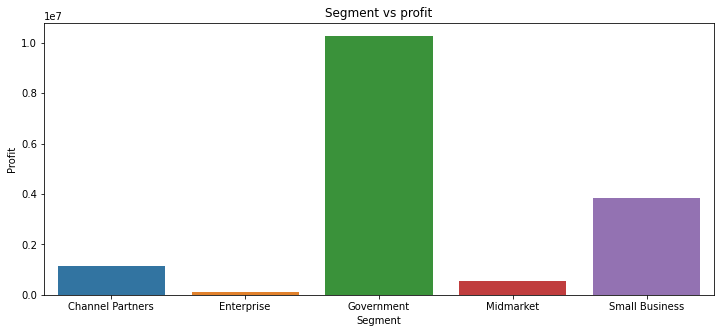

In [18]:
# creat bar chart segment vs profit
plt.figure(figsize=(12,5))
sns.barplot(data=segment, x='Segment', y='Profit')
plt.title('Segment vs profit');

In [19]:
country = df.groupby(['Country'], as_index=False)['Profit'].sum()
country

,Country,Profit
0,Canada,3310111.14
1,France,3342749.54
2,Germany,3235904.57
3,Mexico,2919241.11
4,United States of America,3126562.18


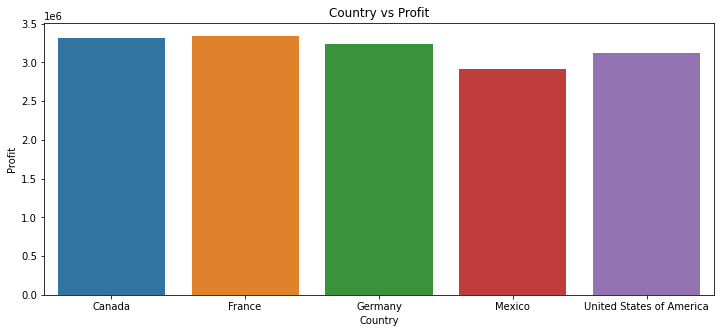

In [20]:
# create a bar chart country vs profit
plt.figure(figsize=(12,5))
sns.barplot(data=country, x='Country', y='Profit')
plt.title('Country vs Profit');

In [21]:
discount = df.groupby(['Discount Band'], as_index=False)['Profit'].sum()
discount

,Discount Band,Profit
0,High,4011235.49
1,Low,6188857.71
2,Medium,5734475.34


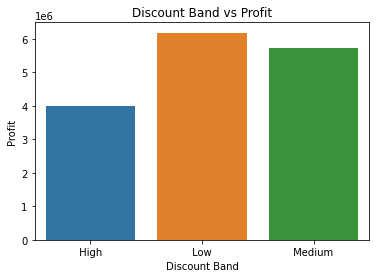

In [22]:
# create a bar chart Discount band vs Profit
sns.barplot(data=discount, x='Discount Band', y='Profit')
plt.title('Discount Band vs Profit');

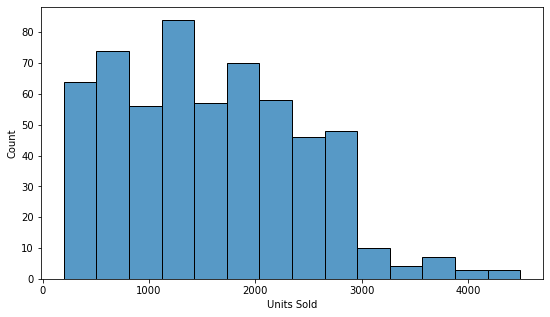

In [23]:
# the distribution of sold units
plt.figure(figsize=(9,5))
sns.histplot(data=df, x='Units Sold');

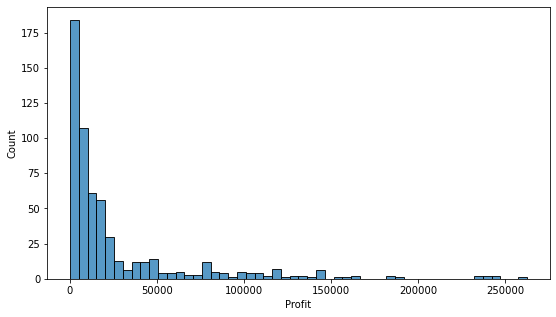

In [24]:
# the distribution of profit
plt.figure(figsize=(9,5))
sns.histplot(data=df, x='Profit');

In [25]:
months = df.groupby(['Month Name'], as_index=False)['Profit'].sum()
months

,Month Name,Profit
0,April,891609.33
1,August,769915.17
2,December,2523189.98
3,February,814151.14
4,January,842163.94
...,...,...
7,March,658104.12
8,May,885455.06
9,November,1337682.00
10,October,3551346.52


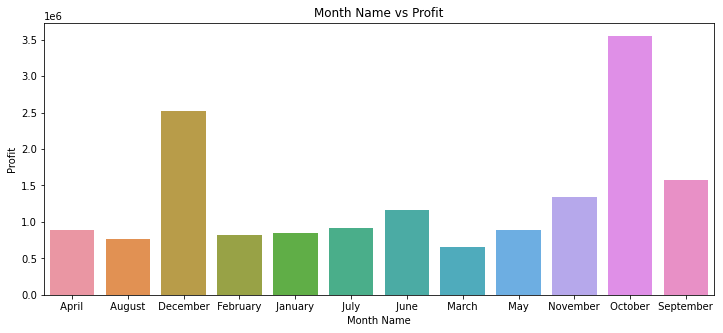

In [26]:
# creat bar chart segment vs profit
plt.figure(figsize=(12,5))
sns.barplot(data=months, x='Month Name', y='Profit')
plt.title('Month Name vs Profit');

In [27]:
year = df.groupby(['Year'], as_index=False)['Profit'].sum()
year

,Year,Profit
0,2013,3743559.01
1,2014,12191009.53


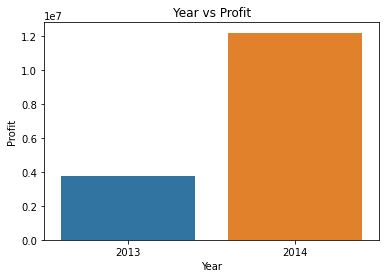

In [28]:
# creat bar chart year vs profit
sns.barplot(data=year, x='Year', y='Profit')
plt.title('Year vs Profit');